<a href="https://colab.research.google.com/github/Hilal-Uygun/Veri-Bilimi-101/blob/main/Veri-Bilimi-101-Proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype
import matplotlib.pyplot as plt
import seaborn as sns

**DOWNLOAD DATA**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training")

print("Path to dataset files:", path)

100%|██████████| 111k/111k [00:00<00:00, 30.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/versions/1


In [3]:
path = "/root/.cache/kagglehub/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/versions/1/dirty_cafe_sales.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [6]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [7]:
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [8]:
df.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [9]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,object
Price Per Unit,object
Total Spent,object
Payment Method,object
Location,object
Transaction Date,object


**CLEAR DATA (MISSING DATA, CHANGE DATA TYPES, MODIFY WRONG DATA)**

In [10]:
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,159


In [11]:
for n, c in df.items():
  if df[n].isnull().sum() > 0:
    df[n + "_na"] = df[n].isnull()
  df[n] = df[n].fillna(method="bfill")

<ipython-input-11-69ece0b0d798>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[n] = df[n].fillna(method="bfill")
<ipython-input-11-69ece0b0d798>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[n] = df[n].fillna(method="bfill")
<ipython-input-11-69ece0b0d798>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[n] = df[n].fillna(method="bfill")
<ipython-input-11-69ece0b0d798>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[n] = df[n].fillna(method="bfill")
<ipython-input-11-69ece0b0d798>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df

In [12]:
df.isnull().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0
Item_na,0
Quantity_na,0


In [13]:
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Item_na,Quantity_na,Price Per Unit_na,Total Spent_na,Payment Method_na,Location_na,Transaction Date_na
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,False,False,False,False,False,False,False
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,False,False,False,False,False,False,False
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19,False,False,False,False,False,False,False
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,False,False,False,False,False,False,False
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,False,False,False,False,False,False,False
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,Takeaway,2023-03-31,False,False,False,False,False,True,False
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06,False,False,False,False,False,False,False
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28,False,False,False,False,False,False,False
8,TXN_4717867,Sandwich,5,3.0,15.0,Cash,Takeaway,2023-07-28,True,False,False,False,True,False,False
9,TXN_2064365,Sandwich,5,4.0,20.0,Cash,In-store,2023-12-31,False,False,False,False,True,False,False


In [14]:
for i, (n, c) in enumerate(df.items()):
  if i == 2 and c.dtype=="object":
    df[n] = pd.to_numeric(c, errors="coerce").fillna(0).astype("int64")
  elif i == 3 or i == 4 and c.dtype == "object":
    df[n] = pd.to_numeric(c, errors="coerce").astype("float64")
  if i == 7 and i == 14:
    df[n] = pd.to_datetime(c, errors="coerce")

In [15]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,int64
Price Per Unit,float64
Total Spent,float64
Payment Method,object
Location,object
Transaction Date,object
Item_na,bool
Quantity_na,bool


total spent'in quantity ve price çarpımına eşit olup olmadığını kontrol et

In [16]:
wrong = df["Total Spent"] != (df["Quantity"] * df["Price Per Unit"])
df.loc[wrong, "Total Spent"] = (df["Quantity"] * df["Price Per Unit"])

In [17]:
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Item_na,Quantity_na,Price Per Unit_na,Total Spent_na,Payment Method_na,Location_na,Transaction Date_na
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,False,False,False,False,False,False,False
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,False,False,False,False,False,False,False
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19,False,False,False,False,False,False,False
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,False,False,False,False,False,False,False
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,False,False,False,False,False,False,False
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,Takeaway,2023-03-31,False,False,False,False,False,True,False
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06,False,False,False,False,False,False,False
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28,False,False,False,False,False,False,False
8,TXN_4717867,Sandwich,5,3.0,15.0,Cash,Takeaway,2023-07-28,True,False,False,False,True,False,False
9,TXN_2064365,Sandwich,5,4.0,20.0,Cash,In-store,2023-12-31,False,False,False,False,True,False,False


diğer sütunlardaki hatalı verileri bul

In [18]:
df["Payment Method"].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR'],
      dtype=object)

In [19]:
df["Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', 'ERROR', 'Juice', 'Tea'], dtype=object)

In [20]:
df["Location"].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', 'ERROR'], dtype=object)

UNKNOWN ve ERROR olanları düzeltelim

In [21]:
columns = ["Item", "Payment Method", "Location"]

In [22]:
for col in columns:
  df.loc[df[col] == "ERROR", col] = df[col].replace("ERROR", pd.NA).fillna(method="bfill")
  df.loc[df[col] == "UNKNOWN", col] = df[col].replace("UNKNOWN",pd.NA).fillna(method="bfill")

<ipython-input-22-fc01c4e1c7b1>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[df[col] == "ERROR", col] = df[col].replace("ERROR", pd.NA).fillna(method="bfill")
<ipython-input-22-fc01c4e1c7b1>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[df[col] == "UNKNOWN", col] = df[col].replace("UNKNOWN",pd.NA).fillna(method="bfill")
<ipython-input-22-fc01c4e1c7b1>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[df[col] == "ERROR", col] = df[col].replace("ERROR", pd.NA).fillna(method="bfill")
<ipython-input-22-fc01c4e1c7b1>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[df[col] == "UNKNOWN", col] = df[col].replac

In [23]:
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Item_na,Quantity_na,Price Per Unit_na,Total Spent_na,Payment Method_na,Location_na,Transaction Date_na
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,False,False,False,False,False,False,False
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,False,False,False,False,False,False,False
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19,False,False,False,False,False,False,False
3,TXN_7034554,Salad,2,5.0,10.0,Digital Wallet,In-store,2023-04-27,False,False,False,False,False,False,False
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,False,False,False,False,False,False,False
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,Takeaway,2023-03-31,False,False,False,False,False,True,False
6,TXN_4433211,Sandwich,3,3.0,9.0,Cash,Takeaway,2023-10-06,False,False,False,False,False,False,False
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,Takeaway,2023-10-28,False,False,False,False,False,False,False
8,TXN_4717867,Sandwich,5,3.0,15.0,Cash,Takeaway,2023-07-28,True,False,False,False,True,False,False
9,TXN_2064365,Sandwich,5,4.0,20.0,Cash,In-store,2023-12-31,False,False,False,False,True,False,False


<ipython-input-24-687858e24f71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item', y='Quantity', data=item_counts, palette="viridis")


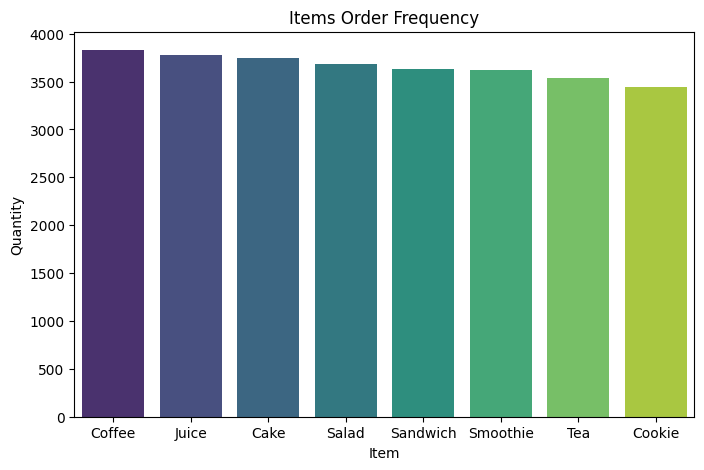

In [24]:
item_counts = df.groupby("Item")["Quantity"].sum().reset_index()
item_counts = item_counts.sort_values(by="Quantity", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Item', y='Quantity', data=item_counts, palette="viridis")
plt.title("Items Order Frequency")
plt.show()

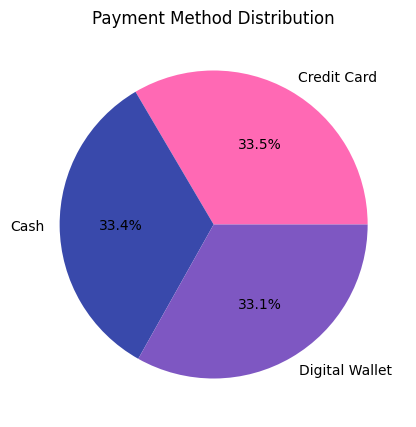

In [25]:
plt.figure(figsize=(8,5))
plt.pie(df["Payment Method"].value_counts(), labels=df['Payment Method'].unique(), autopct="%1.1f%%", colors=["hotpink", "#3949ab", "#7e57c2"])
plt.title("Payment Method Distribution")
plt.show()

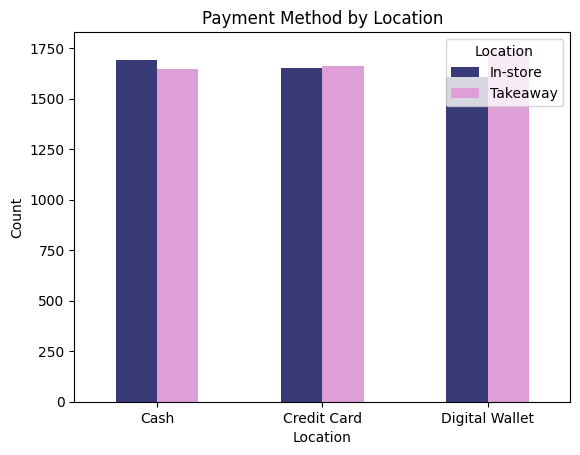

In [26]:
cross_tab = pd.crosstab(df["Payment Method"], df['Location'])
cross_tab.plot.bar(rot=0, colormap="tab20b")
plt.title("Payment Method by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

**MODEL**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import time
import math
from sklearn.preprocessing import OneHotEncoder

In [28]:
categorical_cols = df.select_dtypes(include=["object"]).columns
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

numeric_df = df.select_dtypes(exclude=["object"])

df = pd.concat([numeric_df.reset_index(drop=True), encoded_df], axis=1)

In [29]:
x = df.drop(columns=["Quantity"])
x = df.iloc[:, 1:6].values
y = df.iloc[:, 2].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [30]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25) #train-valid-test 0.6 - 0.2 - 0.2 şeklinde ayrıldı

In [31]:
def rmse(x,y):
  return math.sqrt(((x-y)**2).mean())

In [32]:
def scores(m):
  print(f"RMSE of train {rmse(m.predict(x_train), y_train)}")
  print(f"RMSE of valid {rmse(m.predict(x_val), y_val)}")
  print(f"R^2 of train {m.score(x_train, y_train)}")
  print(f"R^2 of valid {m.score(x_val, y_val)}")

In [33]:
x_train = pd.DataFrame(x_train)  # x_train'i pandas DataFrame yap
x_val = pd.DataFrame(x_val)  # x_val'i pandas DataFrame yap

In [34]:
y_train = pd.DataFrame(y_train)  # x_train'i pandas DataFrame yap
y_val = pd.DataFrame(y_val)  # x_val'i pandas DataFrame yap

In [35]:
# Kategorik sütunlar
categorical_cols_train = x_train.select_dtypes(include=["object"]).columns
categorical_cols_val = x_val.select_dtypes(include=["object"]).columns

# Ortak kategorik sütunlar
common_categorical_cols = list(set(categorical_cols_train) & set(categorical_cols_val))

In [36]:
# One-Hot Encoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Eğitim verisini dönüştür
x_train_encoded = encoder.fit_transform(x_train[common_categorical_cols])
x_train_encoded = pd.DataFrame(x_train_encoded, columns=encoder.get_feature_names_out())

# Sayısal sütunları ekle
numeric_cols_train = x_train.select_dtypes(exclude=["object"])
x_train_final = pd.concat([x_train_encoded, numeric_cols_train.reset_index(drop=True)], axis=1)

# Doğrulama verisini dönüştür
x_val_encoded = encoder.transform(x_val[common_categorical_cols])
x_val_encoded = pd.DataFrame(x_val_encoded, columns=encoder.get_feature_names_out())

# Sayısal sütunları ekle
numeric_cols_val = x_val.select_dtypes(exclude=["object"])
x_val_final = pd.concat([x_val_encoded, numeric_cols_val.reset_index(drop=True)], axis=1)

In [37]:
print(x_train.dtypes)

0    object
1    object
2    object
3    object
4    object
dtype: object


r square

In [56]:
print(y_train.isna().sum())  # Eksik değer sayısı

0


In [39]:
y_train.dropna(inplace=True)

In [57]:
print(x_train.shape)
print(y_train.shape)

(5803, 5)
(5803,)


In [41]:
print(x_train.isna().sum())

0    197
1    197
2      0
3      0
4      0
dtype: int64


In [42]:
x_train.dropna(inplace=True)

In [46]:
print(x_val.isna().sum())
print(y_val.isna().sum())

0    85
1    85
2     0
3     0
4     0
dtype: int64
0    85
dtype: int64


In [47]:
x_val.dropna(inplace=True)
y_val.dropna(inplace=True)

In [58]:
y_train = y_train.squeeze()
y_val = y_val.squeeze()

Random Forest Modeli

In [49]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(x_train, y_train)
m.score(x_train, y_train)

1.0

In [50]:
scores(m)

RMSE of train 0.0
RMSE of valid 0.0
R^2 of train 1.0
R^2 of valid 1.0


Linear Regression Modeli

In [52]:
m2 = LinearRegression()
m2.fit(x_train, y_train)
m2.score(x_train, y_train)

1.0

In [53]:
scores(m2)

RMSE of train 6.7092849743811985e-15
RMSE of valid 6.577596050862075e-15
R^2 of train 1.0
R^2 of valid 1.0


Decision Tree Modeli

In [54]:
m3 = DecisionTreeRegressor()
m3.fit(x_train, y_train)
m3.score(x_train, y_train)

1.0

In [55]:
scores(m3)

RMSE of train 0.0
RMSE of valid 0.0
R^2 of train 1.0
R^2 of valid 1.0
